
# Project for Data Processing Workshop III

## By Dr. Zhe Xuanyuan


## Modified from Udacity Neural Network tutorials

www.udacity.com


## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. 

There are four steps:

> Step 1: Load The Data

> Step 2: Dataset Summary & Exploration

> Step 3: Design and Test a Model Architecture

> Step 4: Test a Model on New Images

If you see "TODO: ", it means you need to finish the unfinished codes and run the block to see if its output is as expected.

If you see "COMMENTS: ", it means you need to read and understand the provided codes and write comments and explanation of the codes.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a report to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. In the report, you need to describe at least two problem encountered in setting up the development environment and implementing the codes, and the solutions to them.

In order to stand out for your project, you may also try to answer the following questions in your report:
- What is the accuracy of your model?
- How to increase the accuracy of your model?
- Can you use the model to classify other objects as well? What is the workflow?
- Can you use other models to classify the traffic signs? How to use new models?

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 1: Load The Data

- Download the data from 

> link: https://pan.baidu.com/s/1nrXQvs0EGI3bmK6jeN2nAw 

> code: 4eqc 

- put the data somewhere in your file system, e.g., the same fold with this notebook file
- the .p files are images and labels compressed together in a single file for convinient access

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "C://Users//Lenovo//jupyter//workshop//WS_homework//Files for students-20220411//traffic-signs-data//train.p"
validation_file= "C://Users//Lenovo//jupyter//workshop//WS_homework//Files for students-20220411//traffic-signs-data//valid.p"
testing_file = "C://Users//Lenovo//jupyter//workshop//WS_homework//Files for students-20220411//traffic-signs-data//test.p"

#  COMMENTS: This part is used to load the train, vaild and test set and put the data into the variable
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#  COMMENTS: sperate to feature(picture) and label(expected output)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# COMMENTS: To check whether feature has the same length of result, if not, it will return error
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 2: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


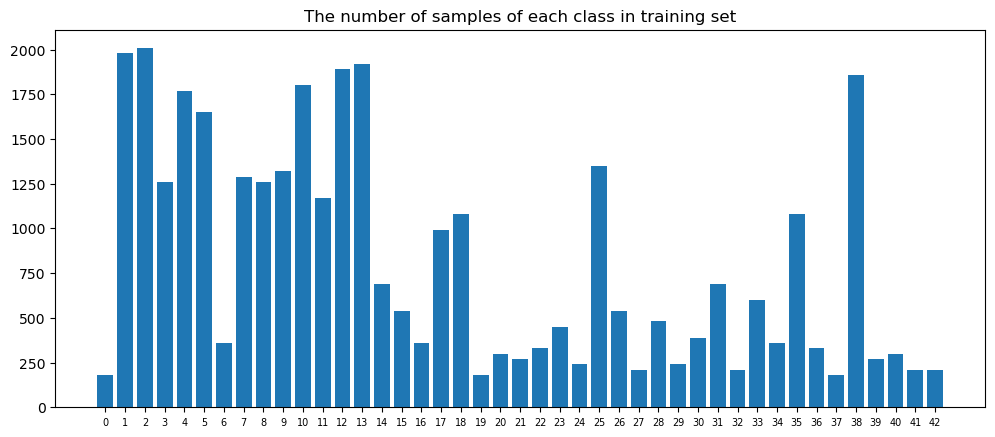

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset. Try "np.unique"
n_classes = len(np.unique(y_train))

# TODO: What are the IDs of the classes, how many samples of each class are in the training set. Try "np.unique".
class_id, class_counts = np.unique(y_train), np.bincount(y_train)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(class_id)
print(class_counts)



#TODO: Draw a bar chart that shows the number of samples of each class in training set, try plt.bar() and plt.show()

# setting on the figure
plt.figure(dpi=100,figsize=(12,5))
plt.bar(class_id,class_counts)

# adding title
plt.title("The number of samples of each class in training set")

# modify the x label
num_list=[str(x) for x in class_id]
plt.xticks(class_id,num_list,fontsize=7)
plt.show()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2


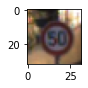

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
# Visualizations will be shown in the notebook.

# COMMENTS: randomly select the training picture by generating a random index
index = random.randint(0,len(X_train)-1)
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
# plt.imshow(image)

# COMMENTS: Display the expected output for the random picture
print(y_train[index])

----

## Step 3: Implement and Test a Model Architecture

Implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).


Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.


### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(32, 32, 3)
12


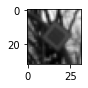

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

# This function uses OpenCV library to convert RGB color images into gray scale images, which contain only one color channel
def grayscale(img):
    grayimg = np.zeros((32,32,1))
    grayimg[:,:,0]=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return grayimg

X_train, y_train = shuffle(X_train, y_train)

# COMMENTS: Initialize the array for storing the gray picture, the length of array is decided by the length of data
X_train_gray = np.zeros((len(X_train),32,32,1))
X_valid_gray = np.zeros((len(X_valid),32,32,1))
X_test_gray = np.zeros((len(X_test),32,32,1))


# COMMENTS: RGB format is generally three channels. After being converted to gray image, it becomes one channel
for i in range(len(X_train)):
    X_train_gray[i] = grayscale(X_train[i])
    
for i in range(len(X_valid)):
    X_valid_gray[i] = grayscale(X_valid[i])
    
for i in range(len(X_test)):
    X_test_gray[i] = grayscale(X_test[i])

image = X_train_gray[index][:,:,0]
print(X_train[index].shape)
plt.figure(figsize=(1,1))

print(y_train[index])
# COMMENTS: show the result of the corresponding picture
plt.imshow(image, cmap="gray")


### TensorFlow setup

In [5]:
#COMMENT: import the tensorflow package
# pip install --upgrade tensorflow==1.15 -i https://pypi.tuna.tsinghua.edu.cn/simple 
# tensorflow 1.x only works for python version <= 3.7.x
# if your python version is >= 3.8, you cannot install tensorflow 1.x
#import tensorflow as tf

# or if you have tensorflow 2.x, you can do the following
import tensorflow.compat.v1 as tf
# disable the version 2 tensorflow
tf.disable_v2_behavior()

# COMMENT: defined the training epochs and batch_size parameters
EPOCHS = 100
BATCH_SIZE = 128

Instructions for updating:
non-resource variables are not supported in the long term


### Model Architecture

In [6]:
# COMMENTS: This code block mainly shows the structure of the LeNet， which is the part of Forward propagation
# The data first passes through the layer composed of convolution layer, 
# activation function and pooling layer twice, 
# then enters the full connection layer and activation function three times, 
# and finally outputs the possibility of each category

# we don't use the flatten below and change it to a newer one
# from tensorflow.contrib.layers import flatten
global_conv2 = tf.zeros((1,5,5,16))
def LeNet_orgin(x):    
    global global_conv2
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    global_conv2 = conv2
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = tf.layers.flatten(conv2) # the previous one is flatten(conv2), have error
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes （43 here, number of classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

# tensorflow model for LeNet
def LeNet(x):    
    global global_conv2
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    global_conv2 = conv2
    
    # Flatten. Input = 5x5x16. Output = 400.
    # we change the flatten function into the tf flatten
    fc0   = tf.layers.flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout
    fc2 = tf.nn.dropout(fc2, 0.4)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes （43 here, number of classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

## Features and Labels

In [7]:
# COMMENTS: modifty the result of the picture into the one hot form, which is represent by 1 or 0
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training Pipeline
Create a training pipeline that uses the model to classify Traffic Sign data.

In [8]:
rate = 0.001

# COMMENTS: define the function of Forward propagation
logits = LeNet(x)

# COMMENTS: define the cross entropy and then get the loss of the function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits( logits=logits,  labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# COMMENTS: Define the model and define the operation
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<ipython-input-6-e3524c77f3c7>:96: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  fc0   = tf.layers.flatten(conv2)
E:\anaconda\lib\site-packages\keras\legacy_tf_layers\core.py:541: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
### Train the model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
 
# training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        # vaildation when training for each time
        validation_accuracy = evaluate(X_valid_gray, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.528

EPOCH 2 ...
Validation Accuracy = 0.713

EPOCH 3 ...
Validation Accuracy = 0.791

EPOCH 4 ...
Validation Accuracy = 0.817

EPOCH 5 ...
Validation Accuracy = 0.852

EPOCH 6 ...
Validation Accuracy = 0.856

EPOCH 7 ...
Validation Accuracy = 0.866

EPOCH 8 ...
Validation Accuracy = 0.890

EPOCH 9 ...
Validation Accuracy = 0.882

EPOCH 10 ...
Validation Accuracy = 0.891

EPOCH 11 ...
Validation Accuracy = 0.898

EPOCH 12 ...
Validation Accuracy = 0.890

EPOCH 13 ...
Validation Accuracy = 0.910

EPOCH 14 ...
Validation Accuracy = 0.906

EPOCH 15 ...
Validation Accuracy = 0.892

EPOCH 16 ...
Validation Accuracy = 0.917

EPOCH 17 ...
Validation Accuracy = 0.922

EPOCH 18 ...
Validation Accuracy = 0.922

EPOCH 19 ...
Validation Accuracy = 0.898

EPOCH 20 ...
Validation Accuracy = 0.919

EPOCH 21 ...
Validation Accuracy = 0.907

EPOCH 22 ...
Validation Accuracy = 0.921

EPOCH 23 ...
Validation Accuracy = 0.926

EPOCH 24 ...
Validation Accura

## Test on the test set

In [11]:
# predict the sign and output the possible result
def predict_sign_all(X_data, y_data):
    num_examples = len(X_data)
    sign_class = np.zeros(len(X_data))
    sess = tf.get_default_session()
    
    prediction_sign = tf.argmax(logits,1)
    
    sign_class = sess.run(prediction_sign, feed_dict={x: X_data, y: y_data})
    return sign_class 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = predict_sign_all(X_test_gray, y_test)
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.934


## Making confusion matrix

After we getting the predict result from the model, we need to make confusion matrix and then visualize the it by the heatmap

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
C=confusion_matrix(y_pred, y_test, labels=class_id)

In [13]:
import plotly.express as px
the_rest=21
z = C[:the_rest,:].tolist()

x_lab = [str(i) for i in class_id.tolist()]
y_lab = [str(i) for i in class_id.tolist()]

fig = px.imshow(z, 
                text_auto=True,
                labels=dict(x="True label", y="Predicted label", color="times"),
                x=x_lab,
                y=y_lab[:the_rest])
fig.show()

In [14]:
z = C[the_rest+1:,:].tolist()
fig = px.imshow(z, 
                text_auto=True,
                labels=dict(x="True label", y="Predicted label", color="times"),
                x=x_lab,
                y=y_lab[the_rest+1:])
fig.show()

In [15]:
# using the precision to replace the value of it
processing_confusion_matrix = np.empty(C.shape)
for i in range(C.shape[0]):
    processing_confusion_matrix[i,:]=(C[i]/np.sum(C[i]))
#     display(processing_confusion_matrix[i])
processing_confusion_matrix = np.around(processing_confusion_matrix,decimals=3)
processing_confusion_matrix

array([[0.793, 0.034, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.012, 0.939, 0.014, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.001, 0.982, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.01 , 0.01 , 0.   , ..., 0.763, 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.896, 0.021],
       [0.   , 0.   , 0.   , ..., 0.034, 0.   , 0.955]])

In [16]:
the_rest=21
z = processing_confusion_matrix[:the_rest,:].tolist()

x_lab = [str(i) for i in class_id.tolist()]
y_lab = [str(i) for i in class_id.tolist()]

fig = px.imshow(z, 
                text_auto=True,
                labels=dict(x="True label", y="Predicted label", color="rate"),
                x=x_lab,
                y=y_lab[:the_rest])
fig.show()

In [17]:
z = processing_confusion_matrix[the_rest+1:,:].tolist()
fig = px.imshow(z, 
                text_auto=True,
                labels=dict(x="True label", y="Predicted label", color="rate"),
                x=x_lab,
                y=y_lab[the_rest+1:])
fig.show()

Then, we need to analysis which labels perform worst and which one best.

In [18]:
import pandas as pd
# get each precision
def precision_F1(data,index):
    precision = data[index,index]/sum(data[index,:])
    return precision

# Get each F1-score to see the performance
def calculate_F1(data,index):
    recall = data[index,index]/sum(data[:,index])
    precision = data[index,index]/sum(data[index,:])
    return 2*recall*precision/(recall+precision)

each_F1 = []
each_precision = []
for i in range(len(class_counts)):
    each_F1.append(calculate_F1(C,i))
    each_precision.append(precision_F1(C,i))

F1_pre_df = pd.DataFrame({'Class':class_id,'F1-score':each_F1,'Precision':each_precision})
F1_rank_df = F1_pre_df.sort_values(by="F1-score",ascending=True)
Precision_rank_df = F1_pre_df.sort_values(by="Precision",ascending=True)

In [19]:
print("The best accuarcy:\n",Precision_rank_df.iloc[-1])
print("\n")
print("The worst accuarcy:\n",Precision_rank_df.iloc[0])

The best accuarcy:
 Class        17.000000
F1-score      0.981716
Precision     0.994302
Name: 17, dtype: float64


The worst accuarcy:
 Class        27.000000
F1-score      0.571429
Precision     0.615385
Name: 27, dtype: float64


From the above data which have the highest accuarcy and the lowest accuarcy, we can find that the class 10 preform best, while the class 40 prefrom worst.

Then we getting the first five which have the low preformance

In [20]:
display(F1_rank_df.head())

Class  F1-score  Precision
27     27  0.571429   0.615385
24     24  0.690909   0.760000
30     30  0.719723   0.748201
0       0  0.779661   0.793103
20     20  0.782178   0.705357

In [21]:
display(Precision_rank_df.head())

Class  F1-score  Precision
27     27  0.571429   0.615385
20     20  0.782178   0.705357
30     30  0.719723   0.748201
24     24  0.690909   0.760000
40     40  0.791444   0.762887

We can print and rank the classification which have the bad performance 

In [22]:
# getting the class
worst_class = Precision_rank_df.head().loc[:,"Class"]
list_worst_class = worst_class.tolist()
list_worst_class

[27, 20, 30, 24, 40]

In [23]:
def obtain_wrong_rank(C,class_id,type_lab):
    # processing the fault dataframe to the right form
    fault_df = pd.DataFrame({'Class':class_id,'Each fault number':C[type_lab,:]})
    sort_fault_df = fault_df.sort_values(by="Each fault number",ascending=False)
    sort_fault_df["Percentage"] = sort_fault_df["Each fault number"]/sum(sort_fault_df["Each fault number"])
    
    # remove the label which the class name is the same as the i
    sort_fault_df_rm_head = sort_fault_df[1:]
    return sort_fault_df_rm_head

# getting each worst class label situation
label_wrong_class_list=[]
for i in worst_class:
    print("This is class",i)
    
    fault_df = obtain_wrong_rank(C,class_id,i)
    display(fault_df.head())
    
    # append the wrong label class
    label_wrong_class_list.extend(fault_df.head()["Class"])

This is class 27


Class  Each fault number  Percentage
24     24                  7    0.134615
18     18                  7    0.134615
11     11                  3    0.057692
21     21                  1    0.019231
7       7                  1    0.019231

This is class 20


Class  Each fault number  Percentage
30     30                  8    0.071429
26     26                  6    0.053571
38     38                  5    0.044643
22     22                  4    0.035714
25     25                  3    0.026786

This is class 30


Class  Each fault number  Percentage
11     11                 16    0.115108
23     23                  4    0.028777
25     25                  4    0.028777
27     27                  2    0.014388
20     20                  2    0.014388

This is class 24


Class  Each fault number  Percentage
25     25                  8    0.106667
18     18                  3    0.040000
27     27                  3    0.040000
29     29                  2    0.026667
4       4                  1    0.013333

This is class 40


Class  Each fault number  Percentage
38     38                  3    0.030928
20     20                  3    0.030928
18     18                  3    0.030928
17     17                  3    0.030928
5       5                  2    0.020619

In [24]:
# Find the characteristics of the category that was misclassified, which is sort according to the times 
wrong_feq=[]
for i in set(label_wrong_class_list):
    wrong_feq.append(label_wrong_class_list.count(i))

C_wrong_df = pd.DataFrame({'Wrong_Class':list(set(label_wrong_class_list)),'Appear time':wrong_feq})
C_wrong_df_rank = C_wrong_df.sort_values(by="Appear time",ascending=False)
C_wrong_df_rank.head()

Wrong_Class  Appear time
6            18            3
12           25            3
2            38            2
4            11            2
14           27            2

We can see that many class are wrong classified to the 18,24,25,22,27. We will analysis by the following aspect:
1. Image quality of the training set for the worst be or being classified category

In [9]:
# get the train data
X_train, y_train = train['features'], train['labels']
X_train.shape

(34799, 32, 32, 3)

In [10]:
def plot_25_image(X_train, y_train, lab_type):
    """ sample 100 image and show them
    assume the image is square

    X_train : (34799, 32, 32, 3)
    y_train : (34799)
    lab_type: int
    """
    y_train_select = [1 if n == lab_type else 0 for n in y_train]
    label_image = np.array(X_train)[np.array(y_train_select).astype(bool)]
    label_image_list = label_image.tolist()
    
    size = sum(np.array(y_train_select))
    res = random.sample(range(size), 25)
    
    fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(8, 8))
    
    count = 0
    
    for r in range(5):
        for c in range(5):
            ax_array[r, c].imshow(label_image_list[res[count]])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            count += 1 

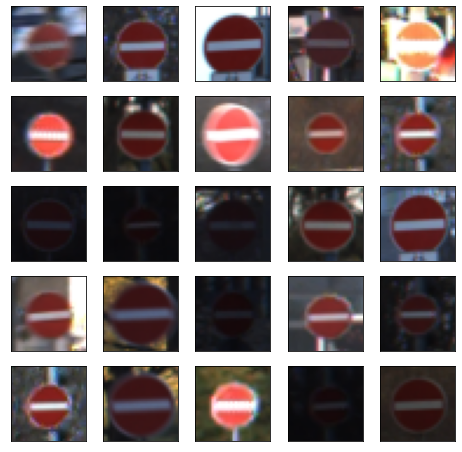

In [12]:
plot_25_image(X_train, y_train, 17)

The training set with corresponding class 27


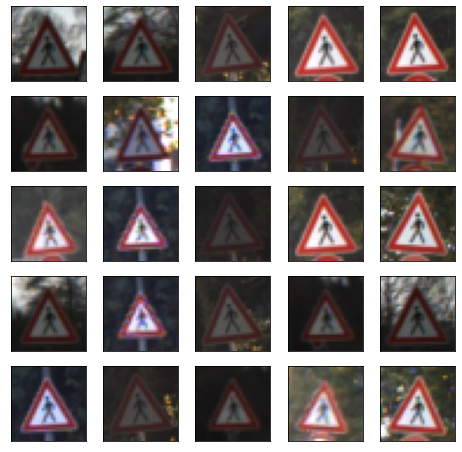

The training set with corresponding class 20


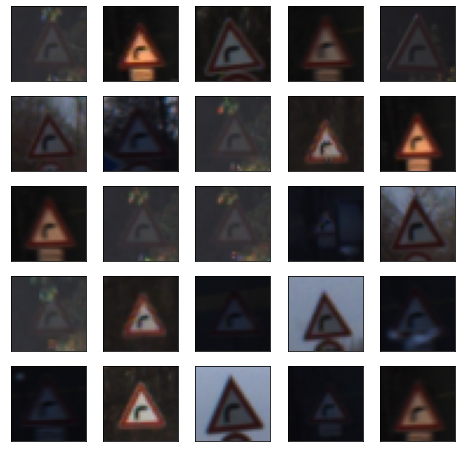

The training set with corresponding class 30


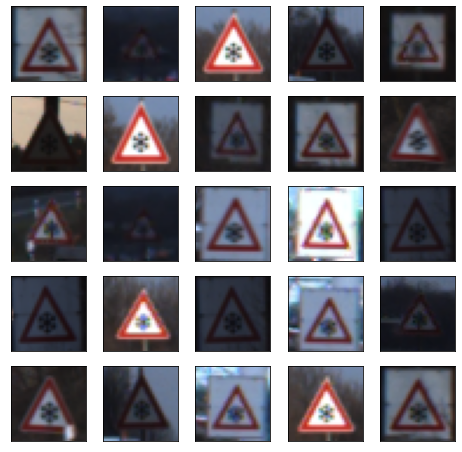

The training set with corresponding class 24


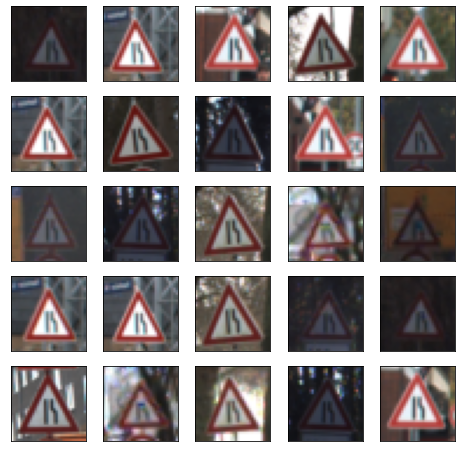

The training set with corresponding class 40


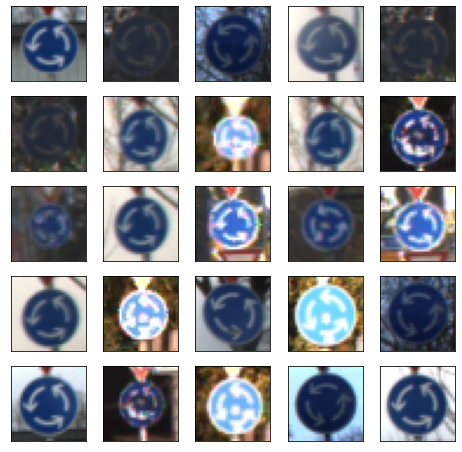

In [27]:
# Misclassification categories
for each in list_worst_class:
    print("The training set with corresponding class",each)
    plot_25_image(X_train, y_train, each)
    plt.show()

As we can observed that the image quality is very bad since there are so many picture with totally black.

We also pick the classes being classified wrong.

The training set with corresponding class 18


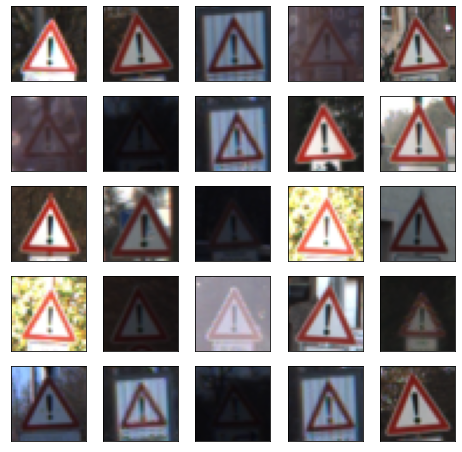

The training set with corresponding class 25


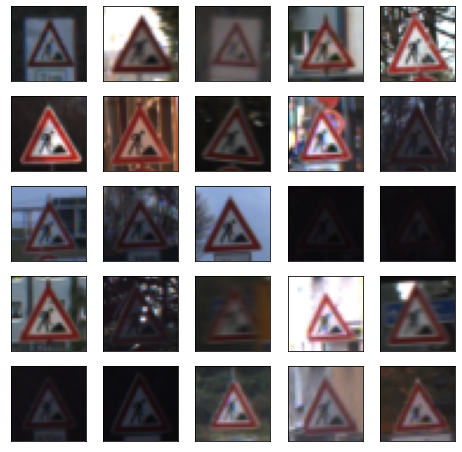

The training set with corresponding class 38


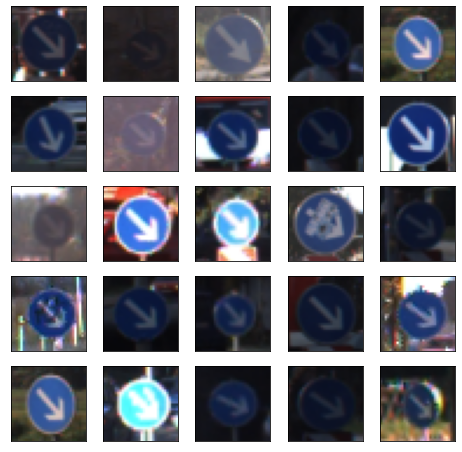

The training set with corresponding class 11


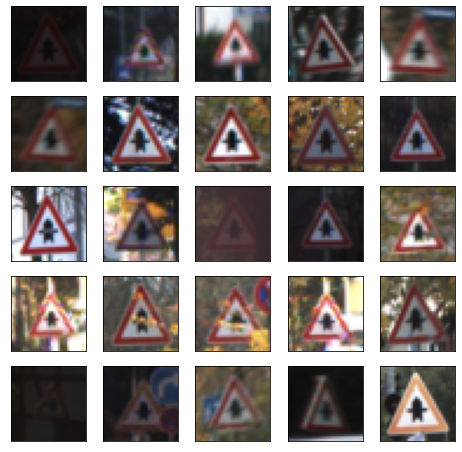

The training set with corresponding class 27


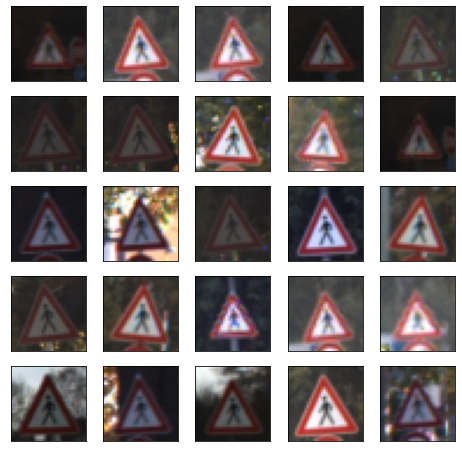

In [31]:
# Misclassified categories
list_wrong = C_wrong_df_rank.head()["Wrong_Class"].tolist()
for each in list_wrong:
    print("The training set with corresponding class",each)
    plot_25_image(X_train, y_train, each)
    plt.show()

2. For the lowest accuarcy one

Class  Each fault number  Percentage
24     24                  7    0.134615
18     18                  7    0.134615
11     11                  3    0.057692
21     21                  1    0.019231
7       7                  1    0.019231

The target set 27


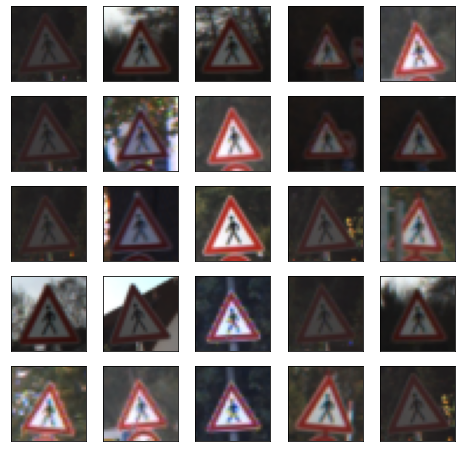

The training set with wrong classified class 18


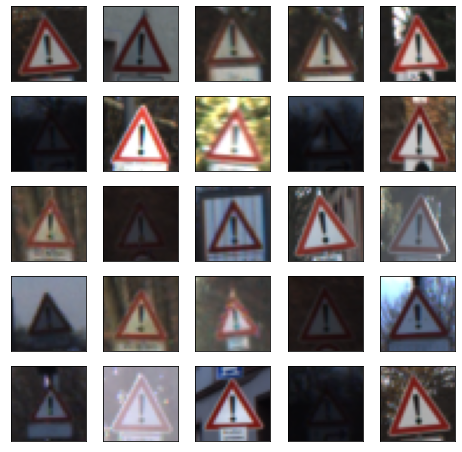

The training set with wrong classified class 25


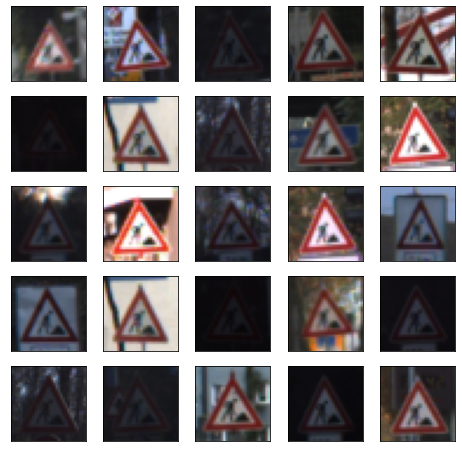

The training set with wrong classified class 38


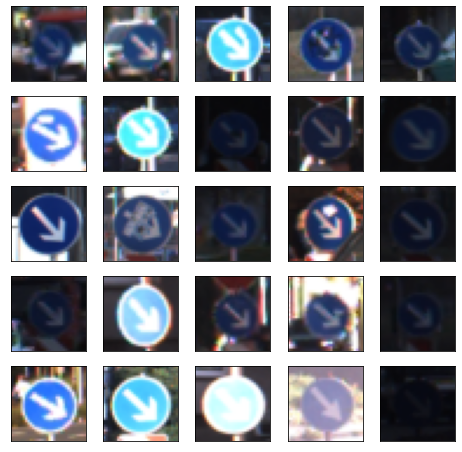

The training set with wrong classified class 11


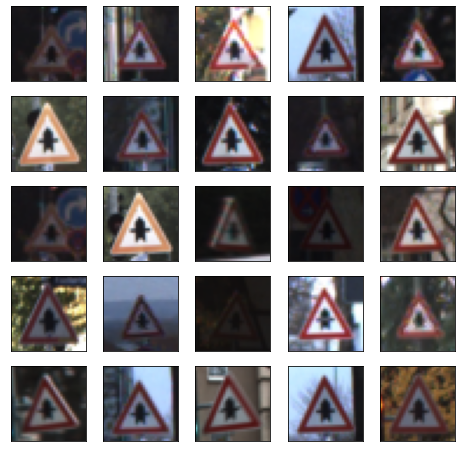

The training set with wrong classified class 27


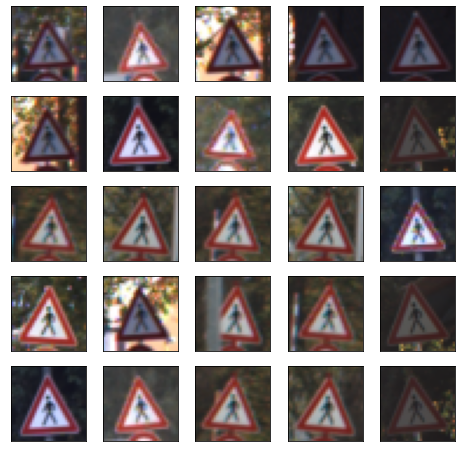

In [29]:
i = list_worst_class[0]
fault_df = obtain_wrong_rank(C,class_id,i)
display(fault_df.head())
fault_df.head()["Class"].tolist()

print("The target set",i)
plot_25_image(X_train, y_train, i)
plt.show()
    
for each in list_wrong:
    print("The training set with wrong classified class",each)
    plot_25_image(X_train, y_train, each)
    plt.show()

From the graph we can see that, the classes being wrong classified is similar to the target one. Besides, the ambigous of the target one is also a very important reason for wrong classified.